<b>Importing libraries</b>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report
from keras.layers.core import Activation
from keras import datasets
from scipy.misc import imresize
from keras.models import Model

<b>Loading data</b>

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test


<b>Visualizations on data</b>

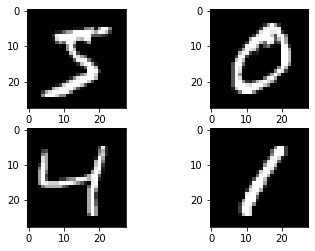

In [6]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

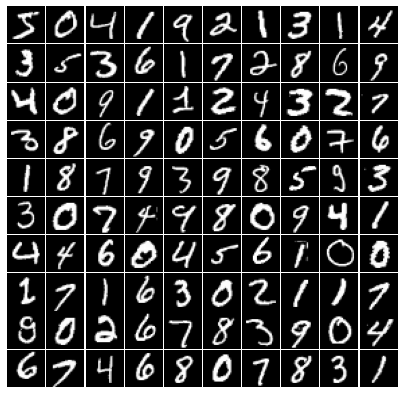

In [7]:
fig, ax_arr = plt.subplots(10, 10, figsize=(7, 7))
fig.subplots_adjust(wspace=.025, hspace=.025)

ax_arr = ax_arr.ravel()
for i, ax in enumerate(ax_arr):
    ax.imshow(x_train[i], cmap="gray")
    ax.axis("off")
    
plt.show()

<b>Parsing through the dataset</b>

In [8]:

img_row, img_cols = 28, 28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_cols, img_row, 1)
x_test = x_test.reshape(x_test.shape[0], img_cols, img_row, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [9]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (42000, 28, 28, 1) X_label shape: (42000,)
Val_set shape: (18000, 28, 28, 1) val_label shape: (18000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


<b>normalization of data</b>

In [10]:

x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

<b>formatting the data for model input</b>

In [11]:
num_labels = 10

im_row = 227
im_col = 227

def reformat(dataset):
    dataset = np.asarray([img_to_array(array_to_img(im, scale=False).resize((im_row, im_col))) for im in dataset])
    return dataset

y_train = keras.utils.to_categorical(y_train)
x_train  = reformat(x_train)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)
x_test  = reformat(x_test)
print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)
x_val  = reformat(x_val)
print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (42000, 227, 227, 1) X_label shape: (42000, 10)
test set shape: (10000, 227, 227, 1) test label shape (10000, 10)
val set shape: (18000, 227, 227, 1) val_lavels shape: (18000, 10)


In [12]:
num_classes=10

<b>AlexNet Architecture</b>

In [15]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,1), kernel_size=(11, 11), strides=(4, 4), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))

# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))



# Output Layer
model.add(Dense(num_classes, activation='softmax'))


<b>Model Summary</b>

In [16]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 256)        

<b>Compiling a model</b>

In [17]:
# Compile the model
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [18]:
batch_size = 32
num_classes = 10
epochs = 10

In [19]:
hist = model.fit(x_train, y_train, batch_size= batch_size, epochs= 10, verbose=1, validation_data=(x_val,y_val))


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 105s 2ms/step - loss: 0.2850 - accuracy: 0.9099 - val_loss: 0.1071 - val_accuracy: 0.9724s - lo - ETA: 21s - loss: 0.3456 - accuracy - - ET - ETA: 12s - loss: - ETA: 10s - loss: 0.3103 - accuracy: 0. - ET - ETA:  - - ETA: 3s - loss: 0.2917  - ETA: 
Epoch 2/10
42000/42000 [==============================] - 102s 2ms/step - loss: 0.0657 - accuracy: 0.9815 - val_loss: 0.0522 - val_accuracy: 0.9849TA: 1:24 - los - ETA: 1:18 - loss: 0.0817 - accuracy:  - ETA: 1:18 - - ETA: 1:17 - loss: 0.0811 - accuracy:  - ETA: 1:17 - loss: 0.0806 - ac - ETA - ETA:  - ETA: 48s - loss: 0.0777 - accuracy: 0. - ETA: 48s - lo - ETA: 40s - loss: 0.0760 - accurac - ETA: 37s - loss - ETA: 35s - ETA: 33s - loss: 0.0723 - acc - ETA: 32s - loss - ETA
Epoch 3/10
42000/42000 [==============================] - 107s 3ms/step - loss: 0.0432 - accuracy: 0.9873 - val_loss: 0.0508 - val_accuracy: 0.9857
Epoch 4/10
420

In [20]:
score = model.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 11s 1ms/step
Test loss: 0.04695865127216837
Test accuracy: 0.9908999800682068


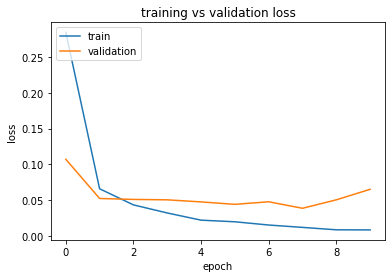

In [21]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("training vs validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

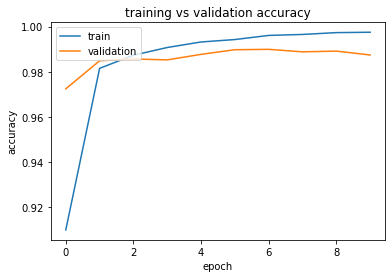

In [22]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("training vs validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [24]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [26]:
from sklearn.metrics import confusion_matrix,f1_score
target_names = ["Class {}".format(i) for i in range(num_classes)]
print('Confusion Matrix is given by:\n')
print(confusion_matrix(y_true, predicted_classes))

Confusion Matrix is given by:

[[ 974    1    0    1    2    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    1 1022    5    0    0    0    3    0    0]
 [   0    1    1 1005    0    1    0    0    1    1]
 [   0    0    0    0  979    0    1    0    0    2]
 [   2    1    0   11    2  861    4    1    1    9]
 [   1    4    0    0    3    1  947    0    2    0]
 [   0    3    1    0    0    0    0 1023    0    1]
 [   1    0    1    1    1    1    0    0  966    3]
 [   0    0    0    0    9    0    0    3    0  997]]


In [27]:
print('F1-score: {:.2f}\n'.format(f1_score(y_true, predicted_classes,average='micro')))

F1-score: 0.99



In [28]:
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



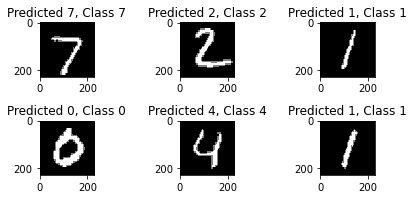

In [42]:
for i, c in enumerate(correct[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()


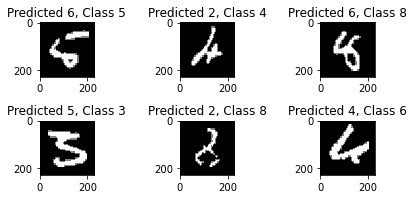

In [43]:
for i, inc in enumerate(incorrect[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(227,227), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()